<a href="https://colab.research.google.com/github/ElhorriAbdelBasset/PyTorch-Fundemantals/blob/main/PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn
import torch
import matplotlib.pyplot as plt

## Binary Classification

In [ ]:
n_samples = 2000

X,Y = make_circles(n_samples, noise=0.05, random_state=40)

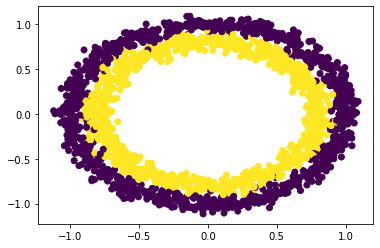

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [ ]:
X, Y = torch.from_numpy(X).type(torch.float), torch.from_numpy(Y).type(torch.float)

TypeError: ignored

In [ ]:
X.dtype, Y.dtype

(torch.float32, torch.float32)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=40)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([1500, 2]),
 torch.Size([500, 2]),
 torch.Size([1500]),
 torch.Size([500]))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class ClassificationModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
    
  def forward(self, X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

In [ ]:
model = ClassificationModel().to(device)
model, model.parameters()

(ClassificationModel(
   (layer_1): Linear(in_features=2, out_features=10, bias=True)
   (layer_2): Linear(in_features=10, out_features=10, bias=True)
   (layer_3): Linear(in_features=10, out_features=1, bias=True)
   (relu): ReLU()
 ), <generator object Module.parameters at 0x7f87d371cc10>)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
def accuracy_fn(Y_gt=None, Y_pr=None):
  corr = torch.eq(Y_gt, Y_pr).sum().item()
  return (corr / len(Y_gt)) * 100

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 2000

# Put all data on target device
X_train, y_train = X_train.to(device), Y_train.to(device)
X_test, y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(Y_gt=y_train, 
                      Y_pr=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(Y_gt=y_test,
                             Y_pr=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69289, Accuracy: 50.13% | Test Loss: 0.69322, Test Accuracy: 49.60%
Epoch: 100 | Loss: 0.69086, Accuracy: 56.47% | Test Loss: 0.69136, Test Accuracy: 54.00%
Epoch: 200 | Loss: 0.68917, Accuracy: 55.93% | Test Loss: 0.69004, Test Accuracy: 54.40%
Epoch: 300 | Loss: 0.68680, Accuracy: 56.73% | Test Loss: 0.68825, Test Accuracy: 55.40%
Epoch: 400 | Loss: 0.68334, Accuracy: 56.67% | Test Loss: 0.68521, Test Accuracy: 56.00%
Epoch: 500 | Loss: 0.67843, Accuracy: 56.80% | Test Loss: 0.68035, Test Accuracy: 58.40%
Epoch: 600 | Loss: 0.67067, Accuracy: 57.67% | Test Loss: 0.67204, Test Accuracy: 59.40%
Epoch: 700 | Loss: 0.65990, Accuracy: 61.00% | Test Loss: 0.66077, Test Accuracy: 63.80%
Epoch: 800 | Loss: 0.64238, Accuracy: 68.60% | Test Loss: 0.64309, Test Accuracy: 70.80%
Epoch: 900 | Loss: 0.60484, Accuracy: 79.47% | Test Loss: 0.60730, Test Accuracy: 75.60%
Epoch: 1000 | Loss: 0.53874, Accuracy: 87.33% | Test Loss: 0.54863, Test Accuracy: 84.40%
Epoch: 1100 | Loss: 0.

In [ ]:
x_train, y_train = X_train.cpu().detach().numpy(), Y_train.cpu().detach().numpy()
x_test, y_test = X_test.cpu().detach().numpy(), Y_test.cpu().detach().numpy()

<Figure size 1080x1080 with 0 Axes>

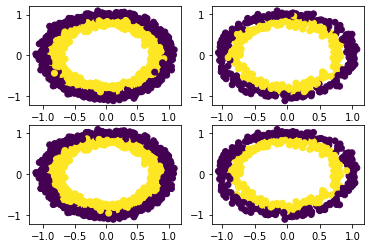

In [ ]:
plt.figure(figsize=(15, 15))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.scatter(x_train[:,0],x_train[:,1],c=y_train)

ax2.scatter(x_test[:,0],x_test[:,1],c=y_test)

ax3.scatter(x_train[:,0],x_train[:,1],c=y_pred.cpu().detach().numpy())

ax4.scatter(x_test[:,0],x_test[:,1],c=test_pred.cpu().detach().numpy())

## Multiclass Classification

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
num_samples = 1000
num_classes = 5
num_features = 2
random_seed = 40

X_blob, Y_blob = make_blobs(n_samples=num_samples, 
                            n_features=num_features, 
                            centers=num_classes, 
                            cluster_std=1.2,
                            random_state=random_seed)

X_blob = torch.from_numpy(X_blob).type(torch.float)
Y_blob = torch.from_numpy(Y_blob).type(torch.float)

X_blob_train, X_blob_test, Y_blob_train, Y_blob_test = train_test_split(X_blob,
    Y_blob,
    test_size=0.2,
    random_state=random_seed
)

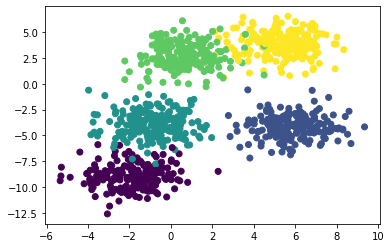

In [ ]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=Y_blob)

In [ ]:
class MultiClassModel(nn.Module):
  def __init__(self, in_features=2, out_features=5, hidden=10):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=out_features),
    )
    

  def forward(self, X):
    return self.layers(X)

  def Train(self, X, Y, X_test, Y_test, epochs=100):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(self.parameters(), lr=0.1)

    for epoch in range(epochs):
      self.train(True)
      logits = self(X)
      predictions = torch.softmax(logits, dim=1).argmax(dim=1)
      loss = loss_fn(logits, Y.type(torch.long))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      model.eval()
      with torch.inference_mode():
        test_logits = self(X_test)
        test_predictions = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, Y_test.type(torch.long))

      if epoch % 10 == 0:
        print(f"{epoch} Train Loss {loss} | Test Loss {test_loss}")
    return predictions, test_predictions

In [ ]:
model = MultiClassModel()
model

MultiClassModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [ ]:
predictions, test_predictions = model.Train(X_blob_train, Y_blob_train, X_blob_test, Y_blob_test, epochs=1501)

0 Train Loss 1.8750317096710205 | Test Loss 1.5624868869781494
10 Train Loss 1.1383057832717896 | Test Loss 1.1140198707580566
20 Train Loss 0.9426263570785522 | Test Loss 0.9263108968734741
30 Train Loss 0.7762010097503662 | Test Loss 0.758596658706665
40 Train Loss 0.5961256623268127 | Test Loss 0.5929777026176453
50 Train Loss 0.49838152527809143 | Test Loss 0.5036906599998474
60 Train Loss 0.5576303601264954 | Test Loss 0.47142037749290466
70 Train Loss 0.45128685235977173 | Test Loss 0.4206722676753998
80 Train Loss 0.39233624935150146 | Test Loss 0.37967997789382935
90 Train Loss 0.3507939577102661 | Test Loss 0.34754258394241333
100 Train Loss 0.31925463676452637 | Test Loss 0.32193973660469055
110 Train Loss 0.29467612504959106 | Test Loss 0.30136018991470337
120 Train Loss 0.27494141459465027 | Test Loss 0.28447476029396057
130 Train Loss 0.25841793417930603 | Test Loss 0.2701108455657959
140 Train Loss 0.244155615568161 | Test Loss 0.257459431886673
150 Train Loss 0.231515824

<Figure size 2160x1080 with 0 Axes>

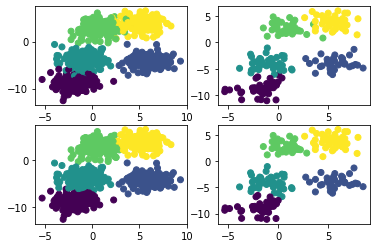

In [ ]:
plt.figure(figsize=(30, 15))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.scatter(X_blob_train[:,0],X_blob_train[:,1],c=Y_blob_train)

ax2.scatter(X_blob_test[:,0],X_blob_test[:,1],c=Y_blob_test)

ax3.scatter(X_blob_train[:,0],X_blob_train[:,1],c=predictions)

ax4.scatter(X_blob_test[:,0],X_blob_test[:,1],c=test_predictions)